<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Hackathons <br> 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>


Data Dictionary :
------------------

1) index		-	Index No/Row No

2) year_of_poll		-	Year for the conducted poll

3) own_self_emp		-	Business Status( Unemployed - 0 , Business Owned - 1 , Self Employed - 2)

4) veteran benefits	-	Veteran Benefits (0 - No Benefits, 1 - Cadre1 Benefits, 2- Cadre2 Benefits)	

5) currently_enrolled	-	Current enrolled in college/school.

6) race			-	Race of people in the poll

7) father_country	-	Birth country of father 

8) educ			-	Specific education status 

9) house_stat		-	Demography in person's house 

10) major_ind_code	-	Different Industries where a person is working 

11) labour_union	-	Member of Labour Union 

12) self_country	-	Country of oneself

13) major_occ_code	-	Occupation a person performs in specific industry 

14) age			-	age of a person

15) mother_country	-	Birth country of mother 

16) house_summary	-	detailed household summary

17) gender		-	Gender of a person

18) hisp_origin		-	Origins of people in South America

19) gains		-	capital gains on investments

20) dividends		-	dividends earned from stocks 

21) marriage_status	-	Current marital status

22) losses		-   	capital losses on investments

23) employer_of		-	Number of people employed under an employer

24) house_1yr_ago	-	Living in house for under 1 yr

25) income_filled	-	Income filled for tax

26) weeks_worked	-	weeks worked in year

27) under18		-	family members under 18

28) hourly_wage		-	wage earned hourly

29) unemp_reason	- 	reason for unemployment 

30) citizenship		-	Citizenship of a person ( ' Foreign born- Not a citizen of U S ':'FB',
				' Native- Born in Puerto Rico or U S Outlying':'NB_PR',' Native- Born in the United States':'NB_US',
				' Foreign born- U S citizen by naturalization':'FB_US',' Native- Born abroad of American Parent(s)':'NB_US_Parents') 

31) woker_type		-	Kind of worker 

32) fed_liability	-	Federal tax liability for people 

33) full_partime_job	-	type of full/part-time job

34) income		-	Less/More than 50k$ yearly


In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [3]:
# load the csv file
# store the data in 'df_admissions'
df = pd.read_csv('train.csv')

# display first five observations using head()
df.head(2)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,no,United-States,Protective services,42,United-States,Householder,M,All_Other,0.000000,0.000000,Married_civilian_Sp_Pr,0.000000,1,No,No,47,NaN,0.000000,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,NaN,United-States,NaN,10,United-States,Child_U18_Unmarried,M,Mex_Amer,0.000000,0.000000,Unmarried,0.000000,0,NaN,No,0,Both_Pr,0.000000,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  105000 non-null  int64  
 1   year_of_poll        105000 non-null  int64  
 2   own_self_emp        105000 non-null  int64  
 3   veteran benefits    105000 non-null  int64  
 4   currently_enrolled  73557 non-null   object 
 5   race                105000 non-null  object 
 6   father_country      105000 non-null  object 
 7   educ                105000 non-null  object 
 8   house_stat          104989 non-null  object 
 9   major_ind_code      105000 non-null  object 
 10  labour_union        69669 non-null   object 
 11  self_country        105000 non-null  object 
 12  major_occ_code      51945 non-null   object 
 13  age                 105000 non-null  int64  
 14  mother_country      105000 non-null  object 
 15  house_summary       105000 non-nul

In [5]:
df.shape

(105000, 34)

In [6]:
#checking missing values in the dataset
null_col=df.columns[df.isna().any()].to_list()
null_count=df[null_col].isna().sum()
null_count_percent=(df[null_col].isna().sum()/len(df))*100

#creating a Dataframe of null count and null percent
null_data=pd.DataFrame({'Count':null_count,'Percentage':null_count_percent}).sort_values(by='Percentage',ascending=False)
null_data.style.highlight_max(color = 'SkyBlue', subset = ['Count','Percentage'])

,Count,Percentage
unemp_reason,101811,96.962857
under18,76016,72.396190
house_1yr_ago,53322,50.782857
major_occ_code,53055,50.528571
woker_type,52835,50.319048
labour_union,35331,33.648571
income_filled,32403,30.860000
currently_enrolled,31443,29.945714
full_partime_job,1392,1.325714
house_stat,11,0.010476


In [7]:
df.drop(['woker_type','major_occ_code','house_1yr_ago','under18','unemp_reason'],axis=1,inplace=True)

In [8]:
df.drop('currently_enrolled',axis=1,inplace=True)

In [9]:
df['labour_union'].unique()

array(['no', nan, 'yes'], dtype=object)

In [10]:
df['labour_union'].mode()

0    no
dtype: object

In [11]:
df['labour_union']=df['labour_union'].replace(to_replace=np.nan,value='no')

In [12]:
df.isnull().sum()

ID                      0
year_of_poll            0
own_self_emp            0
veteran benefits        0
race                    0
father_country          0
educ                    0
house_stat             11
major_ind_code          0
labour_union            0
self_country            0
age                     0
mother_country          0
house_summary           0
gender                  0
hisp_origin             0
gains                   0
dividends               0
marriage_status         0
losses                  0
employer_of             0
income_filled       32403
weeks_worked            0
hourly_wage             0
citizenship             0
fed_liability           0
full_partime_job     1392
income                  0
dtype: int64

In [13]:
df['income_filled'].unique()

array([' No', ' Yes', nan], dtype=object)

In [14]:
df['income_filled'].mode()

0     No
dtype: object

In [15]:
df['income_filled']=df['income_filled'].replace(to_replace=np.nan,value='no')

In [16]:
df.shape

(105000, 28)

In [17]:
df.isnull().sum()

ID                     0
year_of_poll           0
own_self_emp           0
veteran benefits       0
race                   0
father_country         0
educ                   0
house_stat            11
major_ind_code         0
labour_union           0
self_country           0
age                    0
mother_country         0
house_summary          0
gender                 0
hisp_origin            0
gains                  0
dividends              0
marriage_status        0
losses                 0
employer_of            0
income_filled          0
weeks_worked           0
hourly_wage            0
citizenship            0
fed_liability          0
full_partime_job    1392
income                 0
dtype: int64

In [18]:
df['full_partime_job'].unique()

array(['Children/Armed_Forces', ' Full-time schedules',
       ' Not in labor force', nan, ' PT for econ reasons usually PT',
       ' PT for non-econ reasons usually FT', ' Unemployed full-time',
       ' Unemployed part- time', ' PT for econ reasons usually FT'],
      dtype=object)

In [19]:
df.dropna(axis=0,inplace=True)

In [20]:
df.reset_index(inplace=True, drop=True)

In [21]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['income']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_feature = df.drop('income', axis = 1)

In [22]:
df_target.value_counts()

Less than 50K $    64392
More than 50K $    39205
Name: income, dtype: int64

In [23]:
df['income'].value_counts()

Less than 50K $    64392
More than 50K $    39205
Name: income, dtype: int64

In [24]:
df_target.unique()

array(['More than 50K $', 'Less than 50K $'], dtype=object)

In [25]:
for i in range(len(df_target)):
    if df_target[i] == 'More than 50K $':
        df_target[i] = 1
    else:
        df_target[i] = 0 

In [26]:
df_target = df_target.astype(int)

In [27]:
df_target.value_counts()

0    64392
1    39205
Name: income, dtype: int64

## Distribution of dependent variable.

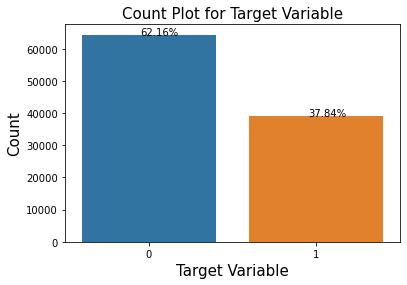

In [28]:
# get counts of 0's and 1's in the 'Loan Status' variable
df_target.value_counts()

# plot the countplot of the variable 'Loan Status'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

In [29]:
df.shape

(103597, 28)

In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
cat=df.select_dtypes(include='object').columns
df[cat]=oe.fit_transform(df[cat])

In [31]:
X_train=df.drop('income',axis=1)

X_train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,income_filled,weeks_worked,hourly_wage,citizenship,fed_liability,full_partime_job
0,0,2004,0,2,2.000000,40.000000,7.000000,16.000000,2.000000,0.000000,40.000000,42,40.000000,0.000000,1.000000,4.000000,0.000000,0.000000,5.000000,0.000000,1,0.000000,47,0.000000,3.000000,4.000000,7.000000
1,1,2005,0,0,2.000000,24.000000,10.000000,8.000000,14.000000,0.000000,40.000000,10,40.000000,3.000000,1.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0,0.000000,0,0.000000,3.000000,1.000000,7.000000
2,2,2004,0,2,2.000000,40.000000,16.000000,28.000000,10.000000,0.000000,40.000000,46,40.000000,4.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,6,1.000000,47,0.000000,3.000000,2.000000,7.000000
3,3,2004,0,2,3.000000,40.000000,12.000000,16.000000,23.000000,0.000000,40.000000,35,40.000000,0.000000,1.000000,4.000000,0.000000,0.000000,5.000000,0.000000,2,2.000000,47,0.000000,3.000000,4.000000,7.000000
4,4,2004,0,2,2.000000,40.000000,12.000000,16.000000,23.000000,0.000000,40.000000,61,40.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3,2.000000,47,0.000000,3.000000,2.000000,7.000000


In [32]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

X_train=df.drop('income',axis=1)
y_train=df[['income']]
lr = LogisticRegression()

lr.fit(X_train,y_train)
print("Training Accuracy")
print(lr.score(X_train,y_train))

predicted = lr.predict(X_train)
print(confusion_matrix(y_train,predicted))
print(classification_report(y_train,predicted))

scoresdt = cross_val_score(lr,X_train,y_train,cv=10,scoring='recall')
print(scoresdt)
print("Average Recall")
print(np.mean(scoresdt))

Training Accuracy
0.6300761605065783
[[58583  5809]
 [32514  6691]]
              precision    recall  f1-score   support

         0.0       0.64      0.91      0.75     64392
         1.0       0.54      0.17      0.26     39205

    accuracy                           0.63    103597
   macro avg       0.59      0.54      0.51    103597
weighted avg       0.60      0.63      0.57    103597

[1.         0.74011732 0.14511604 0.06197399 0.08518235 0.05535714
 0.10357143 0.07959184 0.02704082 0.00637755]
Average Recall
0.23043284720161977


In [33]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
lr = RandomForestClassifier(n_estimators=500,class_weight='balanced')
lr.fit(X_train,y_train)
print("Training Accuracy")
print(lr.score(X_train,y_train))

predicted = lr.predict(X_train)
print(confusion_matrix(y_train,predicted))

scoresdt = cross_val_score(lr,X_train,y_train,cv=10,scoring='recall')
print(scoresdt)
print("Average Recall")
print(np.mean(scoresdt))

Training Accuracy
1.0
[[64392     0]
 [    0 39205]]
[1.         0.64575363 1.         0.9951543  0.48916093 0.99285714
 0.33954082 0.20790816 0.42882653 0.9997449 ]
Average Recall
0.7098946411005105


-----------------------------------------------------------------------------------------------------------------------

In [57]:
df_sub=pd.read_csv('Sample_Submission.csv')
df_sub.shape

(42000, 2)

In [132]:
X_test=pd.read_csv('test.csv',sep=',')
X_test.head(2)

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,major_occ_code,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,house_1yr_ago,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job
0,105000,2005,0,2,College/University,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,NaN,United-States,Precision production craft & repair,32.000000,United-States,Householder,M,All_Other,0.000000,0.000000,Married_civilian_Sp_Pr,0.000000,6,NaN,No,47,NaN,0.000000,NaN,NB_US,Pvt,Joint_both_under65,Full-time schedules
1,105001,2004,0,2,College/University,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,NaN,United-States,Professional specialty,51.000000,United-States,Householder,F,All_Other,0.000000,120.000000,Unmarried,0.000000,6,Yes,NaN,47,NaN,0.000000,NaN,NB_US,Pvt,Single,Children/Armed_Forces


In [133]:
n=2
for i in X_test.select_dtypes(include='object').columns:
    print(i)
    print(X_test[i].unique())
    print('--'*20)

currently_enrolled
['College/University' nan ' High school']
----------------------------------------
race
[' White' ' Black' ' Other' 'Asian/Pacific_Islander'
 'Amer/Indian/Aleut/Eskimo']
----------------------------------------
father_country
[' United-States' ' Iran' ' Puerto-Rico' ' England' ' Germany' ' Cuba'
 ' El-Salvador' ' Philippines' ' Mexico' ' Yugoslavia' ' India' ' Ireland'
 ' Poland' ' Columbia' ' ?' ' Italy' ' Canada' ' China' ' Taiwan'
 ' South Korea' ' Outlying-U S (Guam USVI etc)' ' Vietnam'
 ' Dominican-Republic' ' Nicaragua' ' Cambodia' ' Haiti' ' Laos' ' Peru'
 ' Jamaica' ' Hungary' ' Japan' ' Greece' ' Panama' ' Portugal'
 ' Guatemala' ' Thailand' ' Ecuador' ' Trinadad&Tobago' ' France'
 ' Scotland' ' Honduras' ' Hong Kong' ' Holand-Netherlands']
----------------------------------------
educ
[' Some college but no degree' ' Bachelors degree(BA AB BS)'
 ' 7th and 8th grade' ' High school graduate' ' Doctorate degree(PhD EdD)'
 ' Children' ' 10th grade' ' 9th grade

In [134]:
X_test.shape

(42000, 33)

In [135]:
X_test.isnull().sum()

ID                        0
year_of_poll              0
own_self_emp              0
veteran benefits          0
currently_enrolled    12613
race                      0
father_country            0
educ                      0
house_stat                3
major_ind_code            0
labour_union          14337
self_country              0
major_occ_code        21068
age                     596
mother_country            0
house_summary             0
gender                    0
hisp_origin               0
gains                     0
dividends                 0
marriage_status           0
losses                    0
employer_of               0
house_1yr_ago         21398
income_filled         13008
weeks_worked              0
under18               30340
hourly_wage               0
unemp_reason          40715
citizenship               0
woker_type            20977
fed_liability             0
full_partime_job        568
dtype: int64

In [136]:
X_test.drop(['woker_type','major_occ_code','house_1yr_ago','under18','unemp_reason'],axis=1,inplace=True)

In [137]:
X_test.drop('currently_enrolled',axis=1,inplace=True)

In [138]:
X_test['labour_union'].unique()

array([nan, 'no', 'yes'], dtype=object)

In [139]:
X_test['labour_union'].mode()

0    no
dtype: object

In [140]:
X_test['labour_union']=X_test['labour_union'].replace(to_replace=np.nan,value='no')

In [141]:
X_test.isnull().sum()

ID                      0
year_of_poll            0
own_self_emp            0
veteran benefits        0
race                    0
father_country          0
educ                    0
house_stat              3
major_ind_code          0
labour_union            0
self_country            0
age                   596
mother_country          0
house_summary           0
gender                  0
hisp_origin             0
gains                   0
dividends               0
marriage_status         0
losses                  0
employer_of             0
income_filled       13008
weeks_worked            0
hourly_wage             0
citizenship             0
fed_liability           0
full_partime_job      568
dtype: int64

In [142]:
X_test['income_filled'].unique()

array([' No', nan, ' Yes'], dtype=object)

In [143]:
X_test['income_filled'].mode()

0     No
dtype: object

In [144]:
X_test['income_filled']=X_test['income_filled'].replace(to_replace=np.nan,value='no')

In [145]:
X_test.shape

(42000, 27)

In [146]:
X_test.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
race                  0
father_country        0
educ                  0
house_stat            3
major_ind_code        0
labour_union          0
self_country          0
age                 596
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
income_filled         0
weeks_worked          0
hourly_wage           0
citizenship           0
fed_liability         0
full_partime_job    568
dtype: int64

In [147]:
X_test['full_partime_job'].unique()

array([' Full-time schedules', 'Children/Armed_Forces',
       ' Not in labor force', ' Unemployed full-time',
       ' PT for econ reasons usually PT', nan,
       ' PT for non-econ reasons usually FT',
       ' PT for econ reasons usually FT', ' Unemployed part- time'],
      dtype=object)

In [148]:
X_test['full_partime_job'].mode()

0    Children/Armed_Forces
dtype: object

In [149]:
X_test['full_partime_job']=X_test['full_partime_job'].replace(to_replace=np.nan,value='no')

In [150]:
X_test['age'].mode()

0   36.000000
dtype: float64

In [151]:
X_test['age']=X_test['age'].replace(to_replace=np.nan,value=36)

In [152]:
X_test['house_stat'].mode()

0     Householder
dtype: object

In [153]:
X_test['house_stat']=X_test['house_stat'].replace(to_replace=np.nan,value=16)

In [154]:
X_test.isnull().sum()

ID                  0
year_of_poll        0
own_self_emp        0
veteran benefits    0
race                0
father_country      0
educ                0
house_stat          0
major_ind_code      0
labour_union        0
self_country        0
age                 0
mother_country      0
house_summary       0
gender              0
hisp_origin         0
gains               0
dividends           0
marriage_status     0
losses              0
employer_of         0
income_filled       0
weeks_worked        0
hourly_wage         0
citizenship         0
fed_liability       0
full_partime_job    0
dtype: int64

In [155]:
X_test.reset_index(inplace=True, drop=True)

In [156]:
n=1
for i in X_test.select_dtypes(include='object').columns:
    print(i)
    print(X_test[i].unique())
    print('--'*20)

race
[' White' ' Black' ' Other' 'Asian/Pacific_Islander'
 'Amer/Indian/Aleut/Eskimo']
----------------------------------------
father_country
[' United-States' ' Iran' ' Puerto-Rico' ' England' ' Germany' ' Cuba'
 ' El-Salvador' ' Philippines' ' Mexico' ' Yugoslavia' ' India' ' Ireland'
 ' Poland' ' Columbia' ' ?' ' Italy' ' Canada' ' China' ' Taiwan'
 ' South Korea' ' Outlying-U S (Guam USVI etc)' ' Vietnam'
 ' Dominican-Republic' ' Nicaragua' ' Cambodia' ' Haiti' ' Laos' ' Peru'
 ' Jamaica' ' Hungary' ' Japan' ' Greece' ' Panama' ' Portugal'
 ' Guatemala' ' Thailand' ' Ecuador' ' Trinadad&Tobago' ' France'
 ' Scotland' ' Honduras' ' Hong Kong' ' Holand-Netherlands']
----------------------------------------
educ
[' Some college but no degree' ' Bachelors degree(BA AB BS)'
 ' 7th and 8th grade' ' High school graduate' ' Doctorate degree(PhD EdD)'
 ' Children' ' 10th grade' ' 9th grade' ' 12th grade no diploma'
 ' 1st 2nd 3rd or 4th grade' ' 11th grade'
 ' Masters degree(MA MS MEng MEd

In [159]:
X_cat=X_test.select_dtypes(include='object')
X_cat.head()

,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,mother_country,house_summary,gender,hisp_origin,marriage_status,income_filled,citizenship,fed_liability,full_partime_job
0,White,United-States,Some college but no degree,Householder,Manufacturing-nondurable goods,no,United-States,United-States,Householder,M,All_Other,Married_civilian_Sp_Pr,No,NB_US,Joint_both_under65,Full-time schedules
1,White,United-States,Bachelors degree(BA AB BS),Nonfamily householder,Medical except hospital,no,United-States,United-States,Householder,F,All_Other,Unmarried,no,NB_US,Single,Children/Armed_Forces
2,White,United-States,7th and 8th grade,In group quarters,Not in universe or children,no,United-States,United-States,Sy_Individual,F,All_Other,Widowed,no,NB_US,Nonfiler,Children/Armed_Forces
3,White,United-States,High school graduate,Secondary individual,Manufacturing-nondurable goods,no,United-States,United-States,Non_Relative,M,All_Other,Unmarried,No,NB_US,Single,Children/Armed_Forces
4,White,Iran,Doctorate degree(PhD EdD),Householder,Public administration,yes,Iran,Iran,Householder,F,All_Other,Widowed,No,FB_US,Single,Children/Armed_Forces


In [166]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
cat=X_test.select_dtypes(include='object').columns
X_test[cat]=oe.fit_transform(X_test[cat].astype(str))

In [167]:
y_pred=lr.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [168]:
X_test['income']=y_pred

In [169]:
X_test.head()

,ID,year_of_poll,own_self_emp,veteran benefits,race,father_country,educ,house_stat,major_ind_code,labour_union,self_country,age,mother_country,house_summary,gender,hisp_origin,gains,dividends,marriage_status,losses,employer_of,income_filled,weeks_worked,hourly_wage,citizenship,fed_liability,full_partime_job,income
0,105000,2005,0,2,2.000000,40.000000,16.000000,16.000000,11.000000,0.000000,40.000000,32.000000,40.000000,0.000000,1.000000,4.000000,0.000000,0.000000,5.000000,0.000000,6,0.000000,47,0.000000,3.000000,4.000000,0.000000,1.000000
1,105001,2004,0,2,2.000000,40.000000,9.000000,18.000000,12.000000,0.000000,40.000000,51.000000,40.000000,0.000000,0.000000,4.000000,0.000000,120.000000,6.000000,0.000000,6,2.000000,47,0.000000,3.000000,2.000000,7.000000,1.000000
2,105002,2004,0,2,2.000000,40.000000,5.000000,17.000000,14.000000,0.000000,40.000000,70.000000,40.000000,7.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0,2.000000,0,0.000000,3.000000,1.000000,7.000000,1.000000
3,105003,2004,2,2,2.000000,40.000000,12.000000,28.000000,11.000000,0.000000,40.000000,25.000000,40.000000,4.000000,1.000000,4.000000,0.000000,0.000000,6.000000,0.000000,2,0.000000,47,0.000000,3.000000,2.000000,7.000000,1.000000
4,105004,2004,0,2,2.000000,20.000000,11.000000,16.000000,18.000000,1.000000,20.000000,65.000000,20.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,6,0.000000,47,0.000000,1.000000,2.000000,7.000000,1.000000


In [170]:
X_test.shape

(42000, 28)

In [171]:
X_test.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits', 'race',
       'father_country', 'educ', 'house_stat', 'major_ind_code',
       'labour_union', 'self_country', 'age', 'mother_country',
       'house_summary', 'gender', 'hisp_origin', 'gains', 'dividends',
       'marriage_status', 'losses', 'employer_of', 'income_filled',
       'weeks_worked', 'hourly_wage', 'citizenship', 'fed_liability',
       'full_partime_job', 'income'],
      dtype='object')

In [172]:
X_test2 = X_test.drop(columns=['year_of_poll', 'own_self_emp', 'veteran benefits', 'race',
       'father_country', 'educ', 'house_stat', 'major_ind_code',
       'labour_union', 'self_country', 'age', 'mother_country',
       'house_summary', 'gender', 'hisp_origin', 'gains', 'dividends',
       'marriage_status', 'losses', 'employer_of', 'income_filled',
       'weeks_worked', 'hourly_wage', 'citizenship', 'fed_liability',
       'full_partime_job',],axis=1)

In [173]:
X_test2.to_csv('mySubmission_2.csv',index=False)